In [4]:
import pandas as pd
import seaborn as sns
sns.set(style="white")
import matplotlib  
import matplotlib.pyplot as plt  
import fiona
import fiona.crs
import shapely
import numpy as np

#Inline Plotting for Ipython Notebook 
%matplotlib inline

%pylab inline 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [14]:
#data after spark selection for each time slots pick up

df = pd.read_csv('freeccc.csv')


df = df.astype(int)

df1 = df.iloc[:,1:]

df1 = df1.apply(pd.to_numeric)


In [15]:
#freecount -- df1
df1.iloc[:,:7] = df1.iloc[:,:7]/22
df1.iloc[:,7:] = df1.iloc[:,7:]/9
duration = np.array([ 360.0,240.0,330.0,60.0,90.0,180.0,180.0,120.0,720.0,120.0,480.0])
avg_wtime = df1.apply(lambda x:  duration/(np.asarray(x)*2), axis = 1)

/Users/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide


In [17]:
avg_wtime = avg_wtime.apply(lambda x: 1/x)

In [25]:
avg_wtime.describe()

12am-6am     6am-10am  10am-3.30pm  3.30pm-4.30 pm  4:30 pm-6pm  \
count  2163.000000  2163.000000  2163.000000     2163.000000  2163.000000   
mean      4.413138     5.077631     6.754275        7.306889     7.149594   
std      10.908400    13.975431    17.947732       18.275779    18.272118   
min       0.001515     0.001515     0.000275        0.000000     0.000000   
25%       0.345833     0.430682     0.484298        0.630303     0.613131   
50%       1.091919     1.236364     1.403030        2.028788     1.909091   
75%       3.499116     3.611742     4.339807        6.028030     6.180808   
max     247.712626   381.153409   405.541873      503.630303   503.469697   

          6pm-9pm      9pm-12am     12am-2am      2am-2pm      2pm-4pm  \
count  2163.000000  2163.000000  2163.000000  2163.000000  2163.000000   
mean      6.918434     6.477308     2.484618     1.917614     2.518644   
std      18.181001    17.543984     5.905263     5.013422     7.225123   
min       0.003535     0.003535     0.000000     0.000000     0.000000   
25%       0.486869     0.394697     0.133333     0.150309     0.183333   
50%       1.524747     1.242424     0.455556     0.438272     0.568519   
75%       5.082071     4.359343     1.776852     1.424691     1.787037   
max     513.497475   478.476768    80.303704   131.423457   200.687037   

          4pm-12am            CT  
count  2163.000000  2.163000e+03  
mean      2.382446  3.027445e+06  
std       7.026458  1.107736e+06  
min       0.000000  0.000000e+00  
25%       0.174769  2.036200e+06  
50%       0.559722  3.052900e+06  
75%       1.737500  4.033800e+06  
max     230.720833  5.032300e+06

In [20]:
avg_wtime['CT'] = df['ct']

In [21]:
avg_wtime.to_csv('agg_wtime.csv')

In [22]:
import geopandas as gpd

ct = gpd.read_file("./nyct2010.shp")

ct.index = ct.BoroCT2010.values.astype(str)

In [11]:
#ct[ct.CTLabel == '21'].index

Index([u'3002100', u'1002100', u'5002100'], dtype='object')

In [14]:
#ct.BoroCode.unique()

array([u'5', u'1', u'3', u'2', u'4'], dtype=object)

In [18]:
land = pd.read_csv('nyc_landuse.csv')

/Users/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,77,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
#land.head()
#type(ct.CT2010[1])

numpy.float64

In [11]:
ct['CT2010'] =ct['CT2010'].astype(float)

In [27]:
landmerge = land.merge(ct, on = 'CT2010', how = 'left')

In [23]:
avg_wtime.index = avg_wtime.CT.values.astype(str)
avg1206 = ct.join(avg_wtime[['12am-6am']])


In [48]:
avg1206['12am-6am'].max()

247.71262626262626

In [52]:
def getLabel(df):
  
    df_label = df.copy()
    df_label[df_label.columns[-1]]= df_label[df_label.columns[-1]].map(lambda r: "Value: more than 10" if r > 10 \
                           else "Value: 6-10 " if (r > 5 and r <= 10) \
                           else "Value: 1-5" if (r > 1 and r <= 5) \
                           else "Value: 0.5-1" if (r > 0.5 and r <= 1) \
                           else "Value: 0-0.5" if (r > 0 and r <= 0.5) 
                           else "nan")   
    
    df_label.reset_index(level=0, inplace=True)
    
    return df_label

labelavg1206 = getLabel(avg1206)

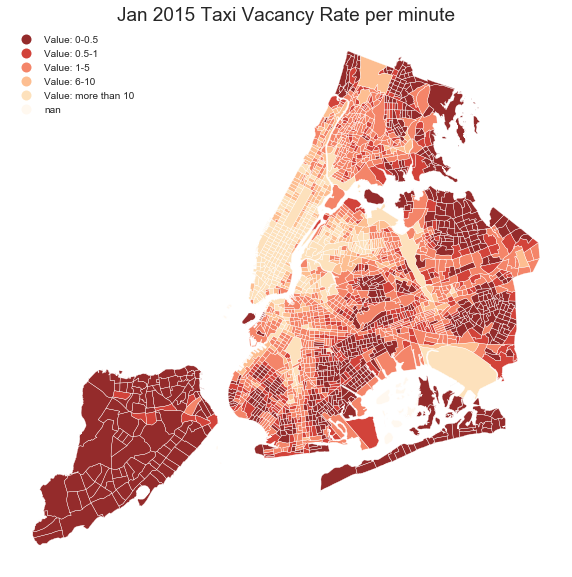

In [55]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_axis_off() 

labelavg1206.plot(column= '12am-6am',cmap='OrRd_r', linewidth=0.3, ax=ax, legend=True, alpha = 0.83, edgecolor = 'white') 
plt.title("Jan 2015 Taxi Vacancy Rate per minute",fontsize=19)

In [33]:
#labelavg0610

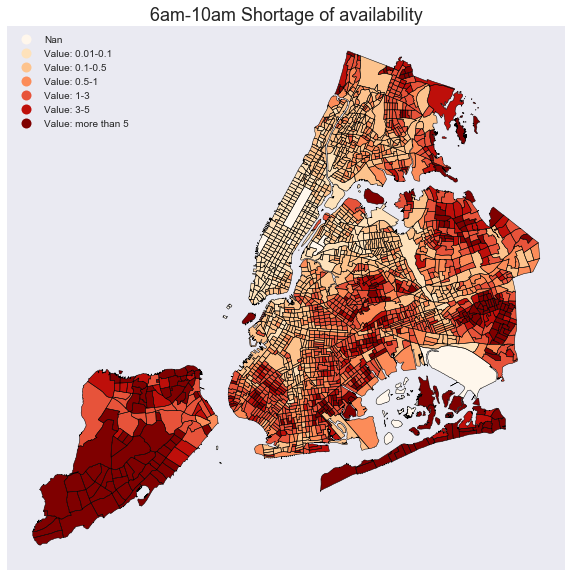

In [38]:
avg0610 = ct.join(avg_wtime[['6am-10am']])

labelavg0610 = getLabel(avg0610)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
labelavg0610.plot(column= '6am-10am',cmap='OrRd', alpha=1,linewidth=0.5,ax=ax, legend=True) 
plt.title("6am-10am Shortage of availability",fontsize=18)



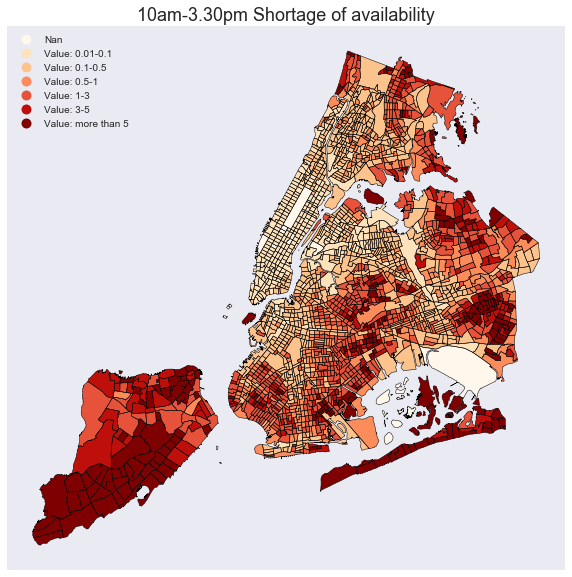

In [39]:
avg1030 = ct.join(avg_wtime[['10am-3.30pm']])

labelavg1030 = getLabel(avg1030)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
labelavg1030.plot(column= '10am-3.30pm',cmap='OrRd', alpha=1,linewidth=0.5,ax=ax, legend=True) 
plt.title("10am-3.30pm Shortage of availability",fontsize=18)


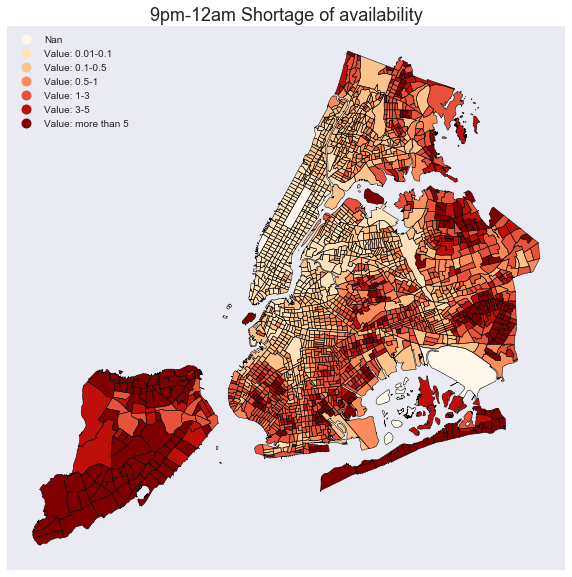

In [40]:
avg0912 = ct.join(avg_wtime[['9pm-12am']])

labelavg0912 = getLabel(avg0912)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
labelavg0912.plot(column= '9pm-12am',cmap='OrRd', alpha=1,linewidth=0.5,ax=ax, legend=True) 
plt.title("9pm-12am Shortage of availability",fontsize=18)


In [ ]:
avg_wtime.rename(columns={'6pm-9pm':'six_nine'}, inplace=True)


In [51]:
avg_wtime.columns

Index([u'12am-6am', u'6am-10am', u'10am-3.30pm', u'3.30pm-4.30 pm',
       u'4:30 pm-6pm', u'6pm-9pm ', u'9pm-12am', u'12am-2am', u'2am-2pm',
       u'2pm-4pm', u'4pm-12am', u'CT'],
      dtype='object')

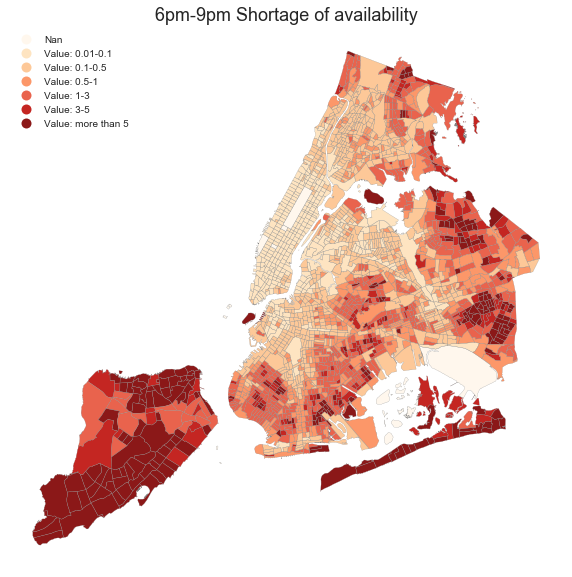

In [52]:

avg0609 = ct.join(avg_wtime[['6pm-9pm ']])

labelavg0609 = getLabel(avg0609)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
labelavg0609.plot(column= '6pm-9pm ',cmap='OrRd', alpha=0.9,linewidth=0.2,ax=ax, legend=True, edgecolor= 'grey') 
ax.set_axis_off() 
plt.title("6pm-9pm Shortage of availability",fontsize=18)



In [9]:
nopick = pd.read_csv('nopickuppred.csv')

nopick.head()

nopick = nopick.drop('Unnamed: 0', 1)
nopick.index = nopick.BoroCT2010.values.astype(str)


nopick.rename(columns={'BoroCT2010':'CT'}, inplace=True)


In [35]:
nopickGeo = ct.join(nopick)

In [37]:
nopickGeo.head()

BoroCT2010 BoroCode       BoroName CDEligibil  CT2010 CTLabel NTACode  \
5000900    5000900        5  Staten Island          I  000900       9    SI22   
1009800    1009800        1      Manhattan          I  009800      98    MN19   
1010000    1010000        1      Manhattan          I  010000     100    MN19   
1010200    1010200        1      Manhattan          I  010200     102    MN17   
1010400    1010400        1      Manhattan          I  010400     104    MN17   

                                           NTAName  PUMA    Shape_Area  \
5000900  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
1009800                    Turtle Bay-East Midtown  3808  1.906016e+06   
1010000                    Turtle Bay-East Midtown  3808  1.860938e+06   
1010200                      Midtown-Midtown South  3807  1.860993e+06   
1010400                      Midtown-Midtown South  3807  1.864600e+06   

             ...        6am-10am_wday 10am-3.30pm_wday  3.30pm-4.30pm_wday  \
5000900      ...                  NaN              NaN                 NaN   
1009800      ...                  NaN              NaN                 NaN   
1010000      ...                  NaN              NaN                 NaN   
1010200      ...                  NaN              NaN                 NaN   
1010400      ...                  NaN              NaN                 NaN   

         4:30pm-6pm_wday  6pm-9pm_wday  9pm-12am_wday  12am-2am_wend  \
5000900              NaN           NaN            NaN            NaN   
1009800              NaN           NaN            NaN            NaN   
1010000              NaN           NaN            NaN            NaN   
1010200              NaN           NaN            NaN            NaN   
1010400              NaN           NaN            NaN            NaN   

         2am-2pm_wend  2pm-4pm_wend  4pm-12am_wend  
5000900           NaN           NaN            NaN  
1009800           NaN           NaN            NaN  
1010000           NaN           NaN            NaN  
1010200           NaN           NaN            NaN  
1010400           NaN           NaN            NaN  

[5 rows x 24 columns]

In [38]:
nopickGeo.to_csv('nopickup.csv')

In [49]:
from fiona.crs import from_epsg
ct = ct.to_crs(epsg=4326)

In [51]:
demanded = pd.read_csv('tripdemanded13.csv')

demanded.head()

demanded = demanded.drop('Unnamed: 0', 1)
demanded.index = demanded.BoroCT2010.values.astype(int).astype(str)


demanded.rename(columns={'BoroCT2010':'CT'}, inplace=True)

Unnamed: 0  BoroCT2010  12am-6am_wday  6am-10am_wday  10am-3.30pm_wday  \
0         0.0   2000200.0           3.25           4.15              7.70   
1         1.0   2027402.0           8.95          10.30              3.70   
2         2.0   2029301.0           4.40           4.45             11.45   
3         3.0   2029302.0         241.90        1242.10            936.50   
4         4.0   2029500.0         588.85         166.65            305.55   

   3.30pm-4.30pm_wday  4:30pm-6pm_wday  6pm-9pm_wday  9pm-12am_wday  \
0                4.85             5.45          4.55           4.70   
1                2.10             3.20         10.75          30.05   
2                0.35             2.15          3.90           1.85   
3              176.05           377.65        837.60         376.40   
4               96.30            48.05        436.60         516.55   

   12am-2am_wend  2am-2pm_wend  2pm-4pm_wend  4pm-12am_wend  
0           3.85          1.65          0.60           1.30  
1           0.30          2.70          4.00          10.75  
2          60.45          0.65          0.30           0.95  
3          59.90        239.55         55.25          70.45  
4          11.50        263.80         33.40         109.70

In [53]:
demanded.head()

CT  12am-6am_wday  6am-10am_wday  10am-3.30pm_wday  \
2000200  2000200.0           3.25           4.15              7.70   
2027402  2027402.0           8.95          10.30              3.70   
2029301  2029301.0           4.40           4.45             11.45   
2029302  2029302.0         241.90        1242.10            936.50   
2029500  2029500.0         588.85         166.65            305.55   

         3.30pm-4.30pm_wday  4:30pm-6pm_wday  6pm-9pm_wday  9pm-12am_wday  \
2000200                4.85             5.45          4.55           4.70   
2027402                2.10             3.20         10.75          30.05   
2029301                0.35             2.15          3.90           1.85   
2029302              176.05           377.65        837.60         376.40   
2029500               96.30            48.05        436.60         516.55   

         12am-2am_wend  2am-2pm_wend  2pm-4pm_wend  4pm-12am_wend  
2000200           3.85          1.65          0.60           1.30  
2027402           0.30          2.70          4.00          10.75  
2029301          60.45          0.65          0.30           0.95  
2029302          59.90        239.55         55.25          70.45  
2029500          11.50        263.80         33.40         109.70

In [58]:
#demandGeo.to_csv('demandGeo.csv')

In [66]:
aggdemanded = pd.read_excel('aggDemandNo.xlsx')

aggdemanded.head()

BoroCT2010  12am-6am_wday  Unnamed: 2
0     2043600           7.45  No Pick-Up
1     2044800           4.35  No Pick-Up
2     4040200           0.40  No Pick-Up
3     4050202           3.05  No Pick-Up
4     4056200           1.80  No Pick-Up

In [67]:
#aggdemanded = aggdemanded.drop('Unnamed: 0', 1)
aggdemanded.index = aggdemanded.BoroCT2010.values.astype(int).astype(str)


aggdemanded.rename(columns={'BoroCT2010':'CT'}, inplace=True)

In [68]:
aggdemandGeo = ct.join(aggdemanded)


In [69]:
aggdemandGeo.head()

BoroCT2010 BoroCode       BoroName CDEligibil  CT2010 CTLabel NTACode  \
5000900    5000900        5  Staten Island          I  000900       9    SI22   
1009800    1009800        1      Manhattan          I  009800      98    MN19   
1010000    1010000        1      Manhattan          I  010000     100    MN19   
1010200    1010200        1      Manhattan          I  010200     102    MN17   
1010400    1010400        1      Manhattan          I  010400     104    MN17   

                                           NTAName  PUMA    Shape_Area  \
5000900  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
1009800                    Turtle Bay-East Midtown  3808  1.906016e+06   
1010000                    Turtle Bay-East Midtown  3808  1.860938e+06   
1010200                      Midtown-Midtown South  3807  1.860993e+06   
1010400                      Midtown-Midtown South  3807  1.864600e+06   

          Shape_Leng                                           geometry  CT  \
5000900  7729.016794  POLYGON ((-74.07920577013249 40.643430783779, ... NaN   
1009800  5534.199811  POLYGON ((-73.96432543478755 40.75638153102423... NaN   
1010000  5692.168737  POLYGON ((-73.9680243691585 40.75957814008616,... NaN   
1010200  5687.802439  POLYGON ((-73.97124277307125 40.76093641851239... NaN   
1010400  5693.036367  POLYGON ((-73.97445730550223 40.76229308355821... NaN   

         12am-6am_wday Unnamed: 2  
5000900            NaN        NaN  
1009800            NaN        NaN  
1010000            NaN        NaN  
1010200            NaN        NaN  
1010400            NaN        NaN

In [70]:

#aggdemandGeo.to_csv('aggdemandGeo.csv')

In [92]:
allUnmet = pd.read_excel('allUnmet.xlsx')


In [93]:
allUnmet.head()

BoroCT2010  12am-6am_wday     Unnamed: 2
0     2000200           3.25  12am-6am_wday
1     2027402           8.95  12am-6am_wday
2     2029301           4.40  12am-6am_wday
3     2029302         241.90  12am-6am_wday
4     2029500         588.85  12am-6am_wday

In [73]:
#allUnmet.rename(columns={'Unnamed: 2':'TimeS'}, inplace=True)

In [94]:
def TimeLabel(df):
  
    df_label = df.copy()
    df_label[df_label.columns[-1]]= df_label[df_label.columns[-1]].map(lambda r: "12:00am" if r =='12am-6am_wday' \
                           else "06:00am" if (r == '6am-10am_wday') \
                           else "10:00am" if (r == '10am-3.30pm_wday') \
                           else "03:30pm" if (r == '3.30pm-4.30pm_wday') \
                           else "04:30pm" if (r == '4:30pm-6pm_wday') \
                        else "06:00pm" if (r == '6pm-9pm_wday') \
                         else "09:00pm" if (r == '9pm-12am_wday') 
                        # else "12:00am weekend" if (r == '12am-2am_wend') \
                         #   else "02:00am weekend" if (r == '2am-2pm_wend') \
                          #   else "02:00pm weekend" if (r == '2pm-4pm_wend') \
                           #   else "04:00pm weekend" if (r == '4pm-12am_wend')                                                                                  
                           else "nan")   
    
    df_label.reset_index(level=0, inplace=True)
    
    return df_label

allUnmetTime = TimeLabel(allUnmet)

In [96]:
allUnmetTime.index = allUnmetTime.BoroCT2010.values.astype(int).astype(str)


In [97]:
allUnmetTime = allUnmetTime.drop('index', 1)

In [100]:
allUnmetTime.rename(columns={'Unnamed: 2':'TimeSlots'}, inplace=True)
allUnmetTime.head()

BoroCT2010  12am-6am_wday TimeSlots
2000200     2000200           3.25   12:00am
2027402     2027402           8.95   12:00am
2029301     2029301           4.40   12:00am
2029302     2029302         241.90   12:00am
2029500     2029500         588.85   12:00am

In [104]:
allUnmetTime.rename(columns={'BoroCT2010':'CT'}, inplace=True)

allUnmetTimeGeo = ct.join(allUnmetTime)
#allUnmetTimeGeo.head()


In [103]:
#allUnmetTimeGeo.to_csv('allUnmetTimeGeo.csv')

In [87]:
def getLabel(df):
  
    df_label = df.copy()
    df_label[df_label.columns[-1]]= df_label[df_label.columns[-1]].map(lambda r: "2-4.6" if r > 2 \
                           else "1-2" if (r > 1 and r <= 2) \
                           else "0.5-1" if (r > 0.5 and r <= 1) \
                           else "0.25-0.5" if (r > 0.25 and r <= 0.5) \
                           else "0-0.25" if (r <= 0.25) \
                           else "nan")   
    
    df_label.reset_index(level=0, inplace=True)
    
    return df_label

label0800 = getLabel(merge0800)
#label0800.head()

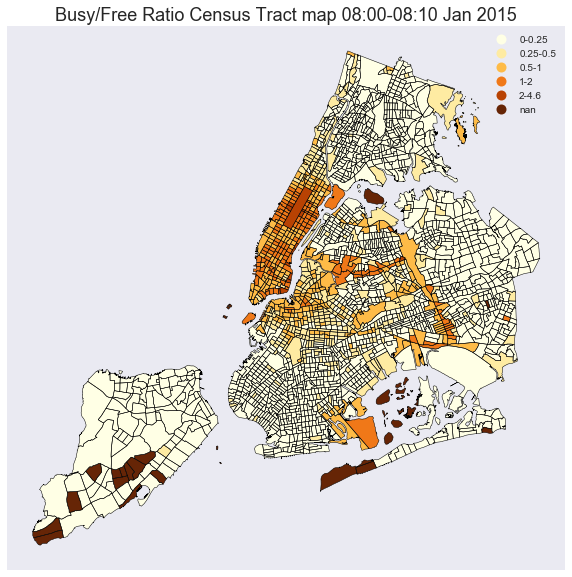

In [109]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0800.plot(column= '0800-0810',cmap='YlOrBr', alpha=1,linewidth=0.5,ax=ax, legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:00-08:10 Jan 2015",fontsize=18)

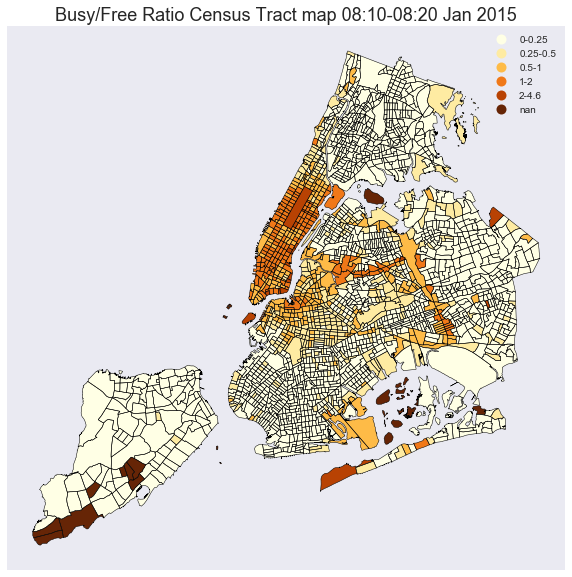

In [102]:
merge0810 = ct.join(data[['0810-0820']])

label0810 = getLabel(merge0810)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0810.plot(column= '0810-0820',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:10-08:20 Jan 2015",fontsize=18)

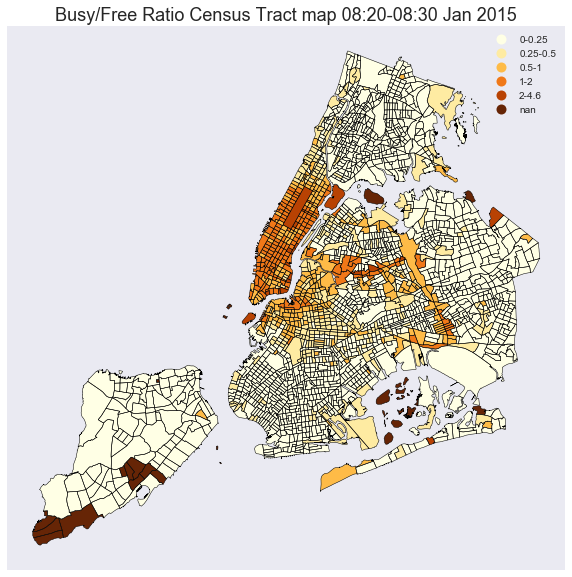

In [103]:
merge0820 = ct.join(data[['0820-0830']])

label0820 = getLabel(merge0820)

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0820.plot(column= '0820-0830',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:20-08:30 Jan 2015",fontsize=18)

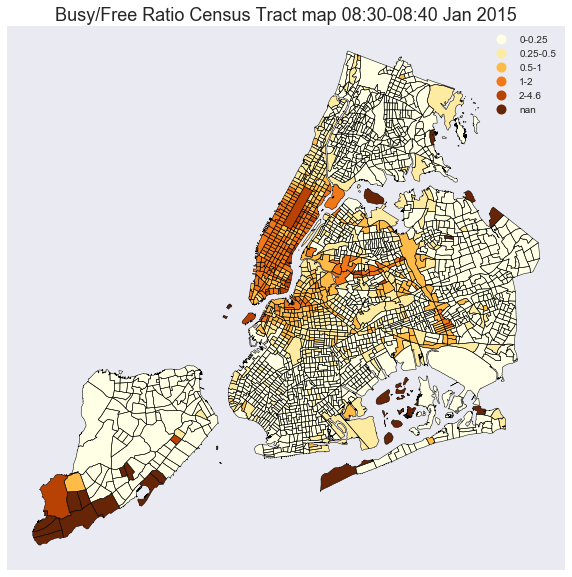

In [104]:
merge0830 = ct.join(data[['0830-0840']])

label0830 = getLabel(merge0830)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0830.plot(column= '0830-0840',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:30-08:40 Jan 2015",fontsize=18)

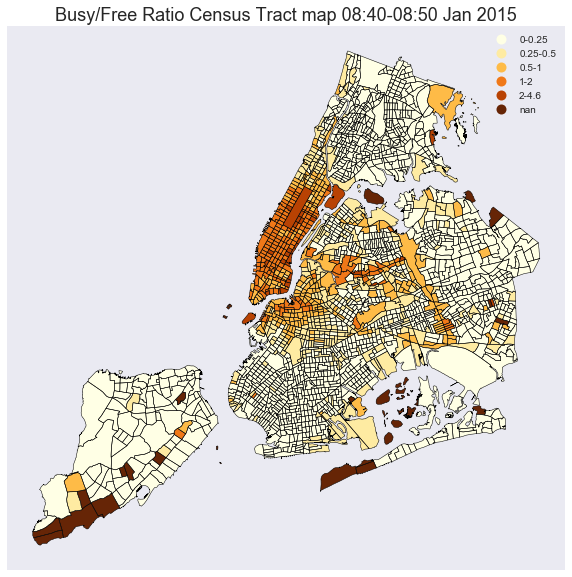

In [105]:
merge0840 = ct.join(data[['0840-0850']])

label0840 = getLabel(merge0840)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0840.plot(column= '0840-0850',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:40-08:50 Jan 2015",fontsize=18)

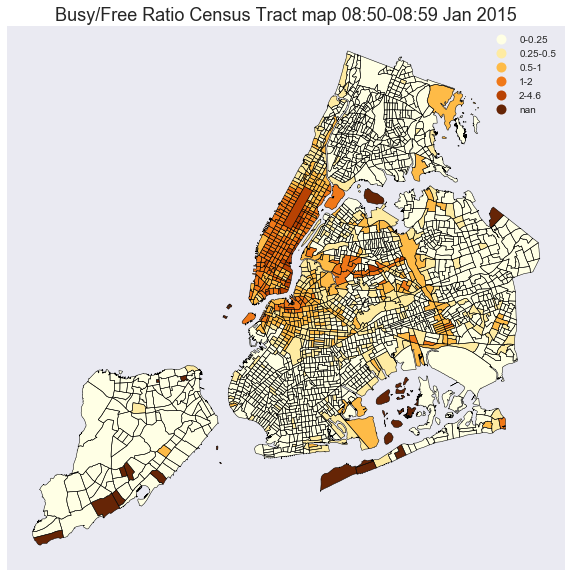

In [107]:
merge0850 = ct.join(data[['0850-0859']])

label0850 = getLabel(merge0850)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0850.plot(column= '0850-0859',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 08:50-08:59 Jan 2015",fontsize=18)

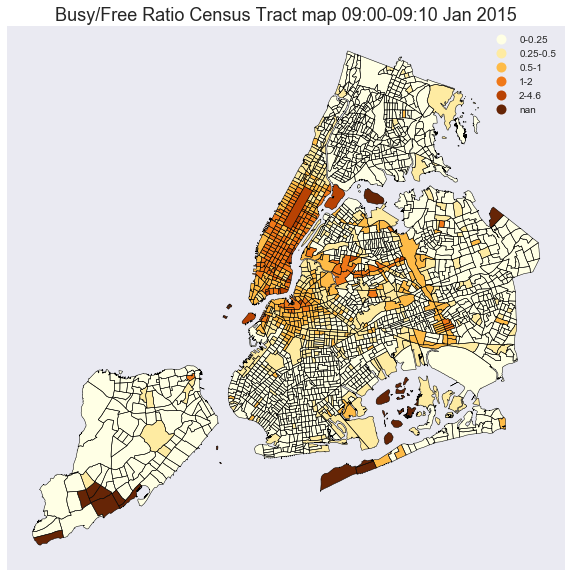

In [111]:
merge0900 = ct.join(data[['0900-0910']])

label0900 = getLabel(merge0900)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label0900.plot(column= '0900-0910',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 09:00-09:10 Jan 2015",fontsize=18)

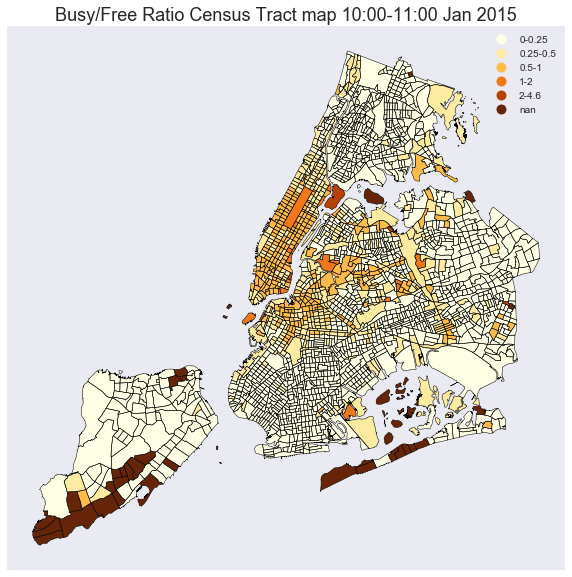

In [113]:
#Sun10-11

merge1011 = ct.join(data[['Sun10-11']])

label1011 = getLabel(merge1011)


f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
label1011.plot(column= 'Sun10-11',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Busy/Free Ratio Census Tract map 10:00-11:00 Jan 2015",fontsize=18)


In [125]:
free = pd.read_csv('freecount.csv')
free.head()

ct  08:00-08:02  08:02-08:04  08:04-08:06  08:06-08:08  08:08-08:10  \
0  4071306           12           11           11           16           15   
1  3034900           15           21           18           24           22   
2  4058500            4            9            7            9           10   
3  2025700           46           44           49           39           39   
4  3017200            4            3            4            4            3   

   else  else.1  else.2  
0   736       0   30888  
1  1122       0   31582  
2   292       0   10089  
3  2298       0   62241  
4   217       0    7510

In [120]:
free['08:00-08:02'].describe()

count    2163.000000
mean       65.736477
std       175.533612
min         0.000000
25%         6.000000
50%        18.000000
75%        51.000000
max      4715.000000
Name: 08:00-08:02, dtype: float64

In [137]:
def getFreeLabel(df):
  
    df_label = df.copy()
    df_label[df_label.columns[-1]]= df_label[df_label.columns[-1]].map(lambda r: "abve 200" if r > 200 \
                           else "80-200" if (r > 80 and r <= 200) \
                           else "50-80" if (r > 50 and r <= 80) \
                           else "25-50" if (r > 25 and r <= 50) \
                           else "10-25" if (r > 10 and r <= 25) \
                           else "0-10" if (r <= 10) \
                           else "nan")   
    
    df_label.reset_index(level=0, inplace=True)
    
    return df_label

In [138]:
free.index = free.ct.values.astype(str) 
free0800 = ct.join(free[['08:00-08:02']])

In [139]:
freeLabel = getFreeLabel(free0800)
freeLabel.head()

index BoroCT2010 BoroCode       BoroName CDEligibil  CT2010 CTLabel  \
0  5000900    5000900        5  Staten Island          I  000900       9   
1  1009800    1009800        1      Manhattan          I  009800      98   
2  1010000    1010000        1      Manhattan          I  010000     100   
3  1010200    1010200        1      Manhattan          I  010200     102   
4  1010400    1010400        1      Manhattan          I  010400     104   

  NTACode                                    NTAName  PUMA    Shape_Area  \
0    SI22  West New Brighton-New Brighton-St. George  3903  2.497010e+06   
1    MN19                    Turtle Bay-East Midtown  3808  1.906016e+06   
2    MN19                    Turtle Bay-East Midtown  3808  1.860938e+06   
3    MN17                      Midtown-Midtown South  3807  1.860993e+06   
4    MN17                      Midtown-Midtown South  3807  1.864600e+06   

    Shape_Leng                                           geometry 08:00-08:02  
0  7729.016794  POLYGON ((962269.1260375977 173705.5001831055,...        0-10  
1  5534.199811  POLYGON ((994133.507019043 214848.8975830078, ...    abve 200  
2  5692.168737  POLYGON ((993108.3057861328 216013.1307983398,...    abve 200  
3  5687.802439  POLYGON ((992216.5391845703 216507.6870117188,...    abve 200  
4  5693.036367  POLYGON ((991325.8815917969 217001.6885986328,...    abve 200

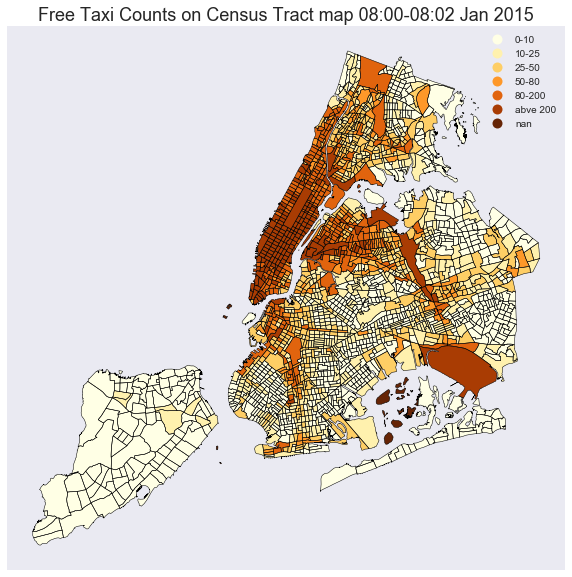

In [144]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
freeLabel.plot(column= '08:00-08:02',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Free Taxi Counts on Census Tract map 08:00-08:02 Jan 2015",fontsize=18)

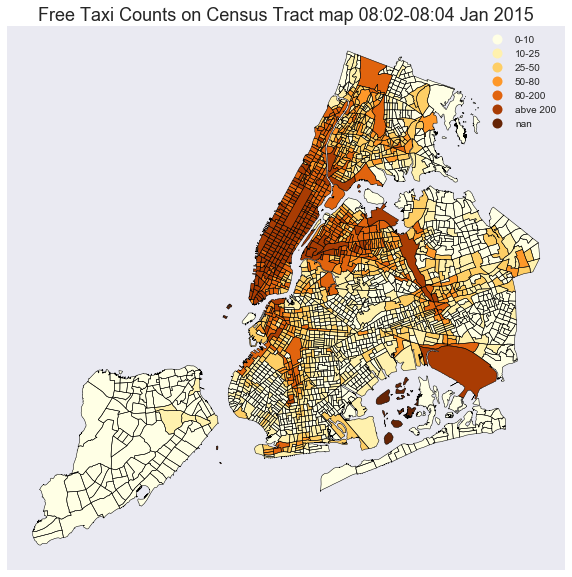

In [145]:
freeLabel0802 = getFreeLabel(ct.join(free[['08:02-08:04']]))

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
freeLabel0802.plot(column= '08:02-08:04',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Free Taxi Counts on Census Tract map 08:02-08:04 Jan 2015",fontsize=18)





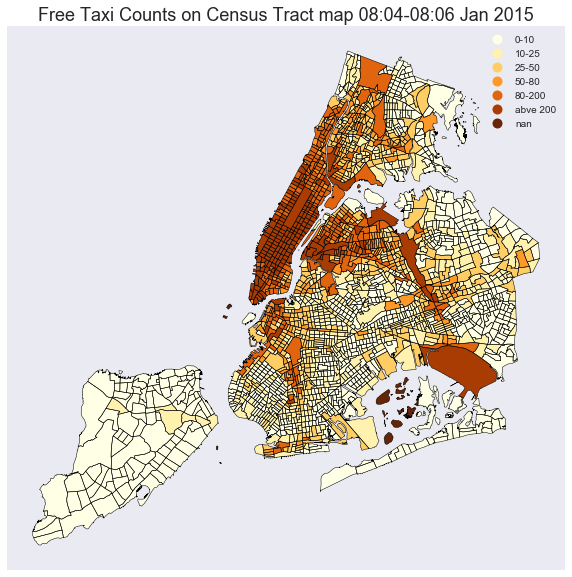

In [148]:
freeLabel0804 = getFreeLabel(ct.join(free[['08:04-08:06']]))

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
freeLabel0804.plot(column= '08:04-08:06',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Free Taxi Counts on Census Tract map 08:04-08:06 Jan 2015",fontsize=18)

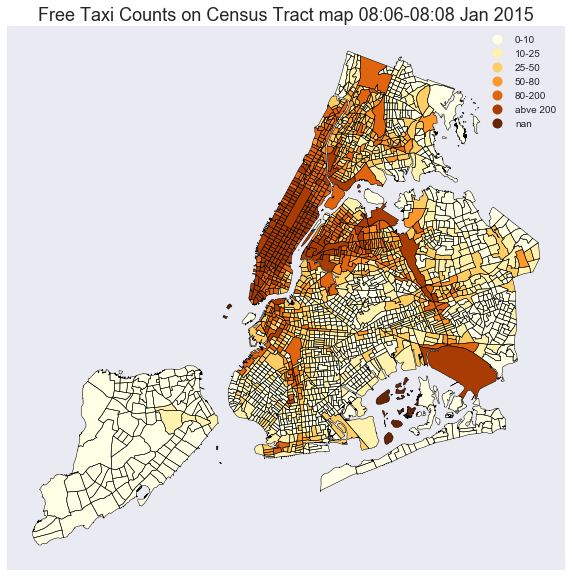

In [143]:
freeLabel0806 = getFreeLabel(ct.join(free[['08:06-08:08']]))

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
freeLabel0806.plot(column= '08:06-08:08',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Free Taxi Counts on Census Tract map 08:06-08:08 Jan 2015",fontsize=18)

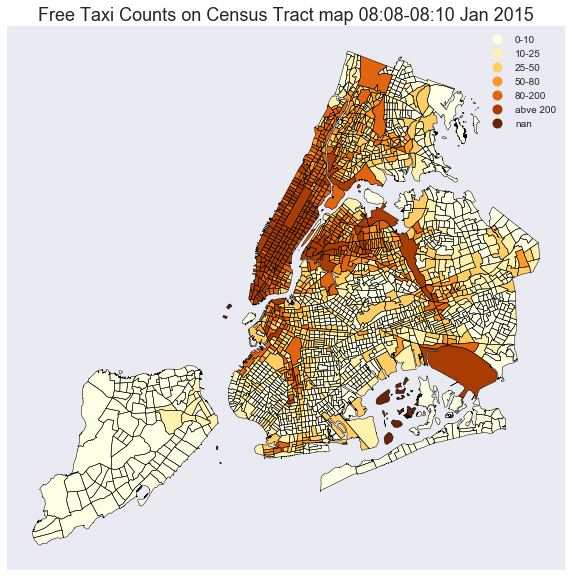

In [147]:
freeLabel0808 = getFreeLabel(ct.join(free[['08:08-08:10']]))

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
freeLabel0808.plot(column= '08:08-08:10',cmap='YlOrBr', alpha=1, linewidth=0.5,ax=ax,legend=True) 
plt.title("Free Taxi Counts on Census Tract map 08:08-08:10 Jan 2015",fontsize=18)